## Transfer Learning Resnet152v2 using Keras

Md. Salahin Mahmud Shoumik

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below
from sklearn import metrics
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input

#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Skin Diseases/train'
valid_path = '/content/drive/MyDrive/Skin Diseases/test'


Working with 877 images
Image examples: 
bkl_3013.jpg


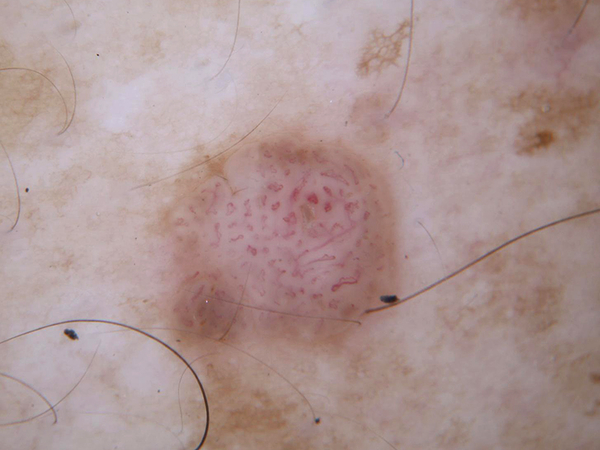

bkl_3014.jpg


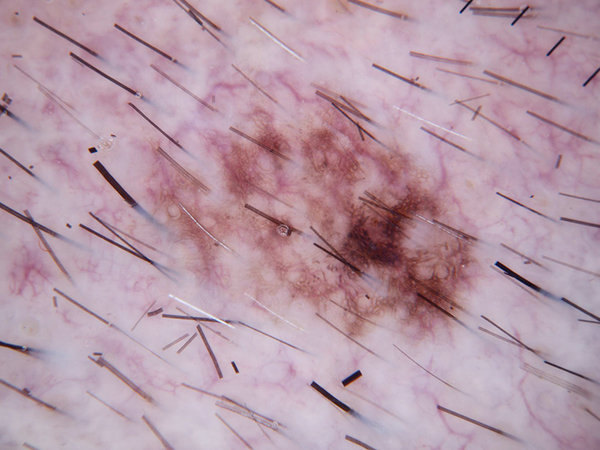

bkl_3015.jpg


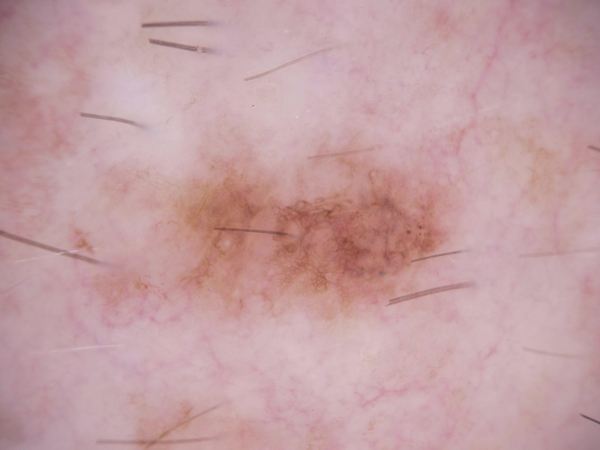

bkl_3016.jpg


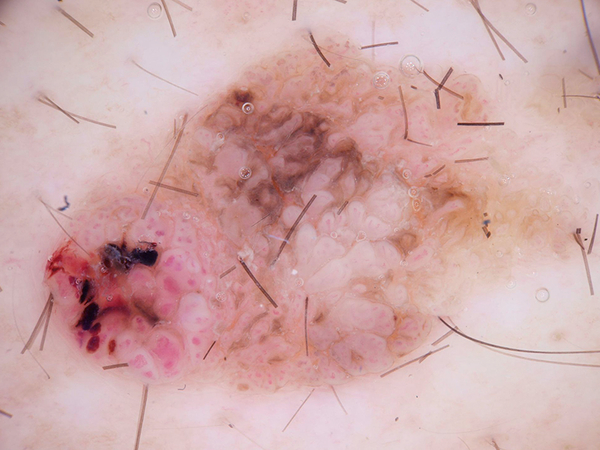

bkl_3017.jpg


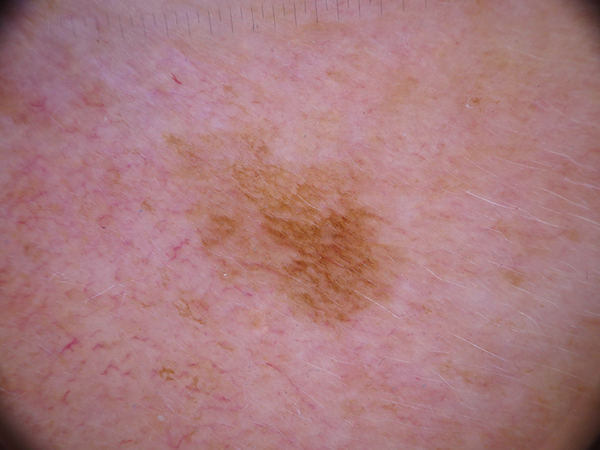

bkl_3019.jpg


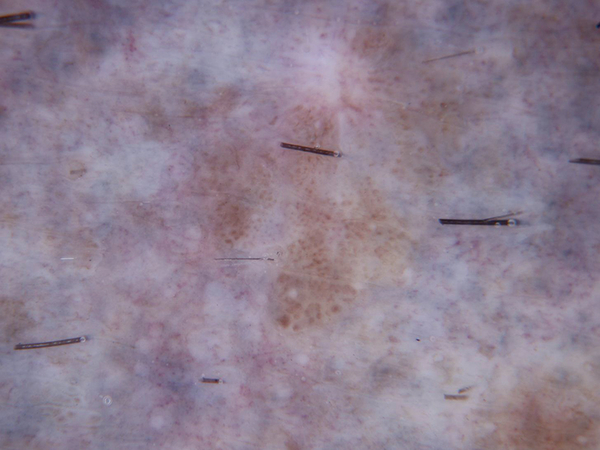

bkl_3018.jpg


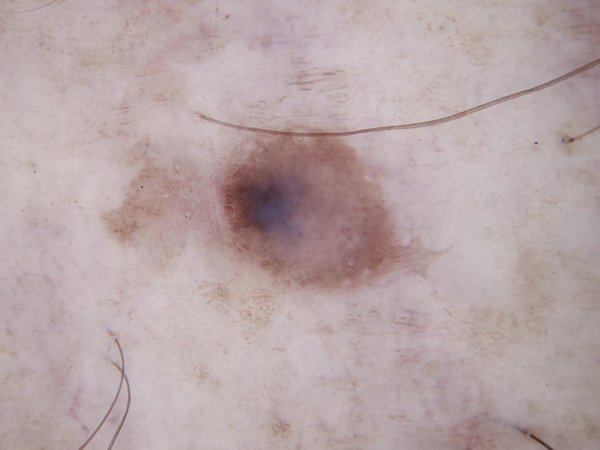

bkl_3020.jpg


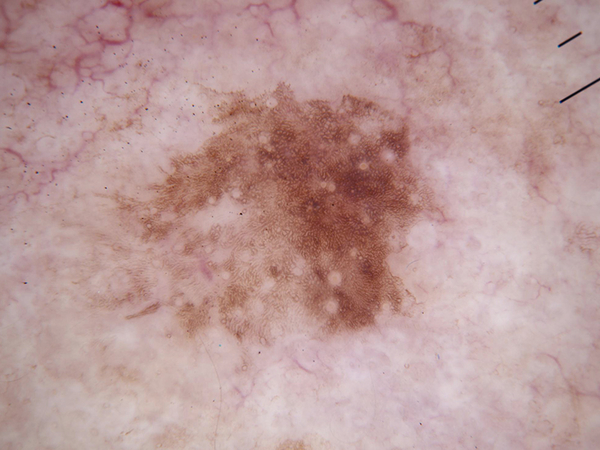

bkl_3021.jpg


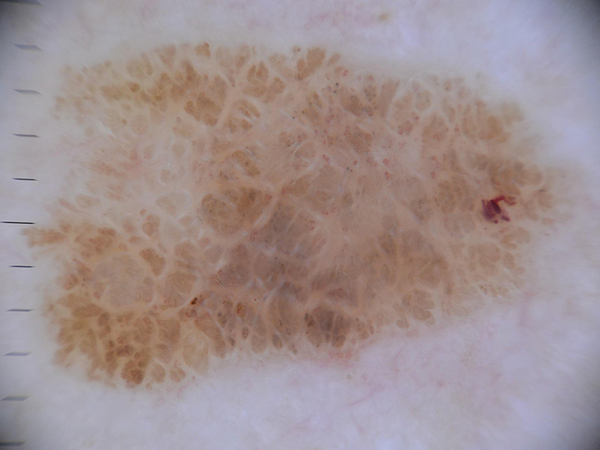

bkl_3022.jpg


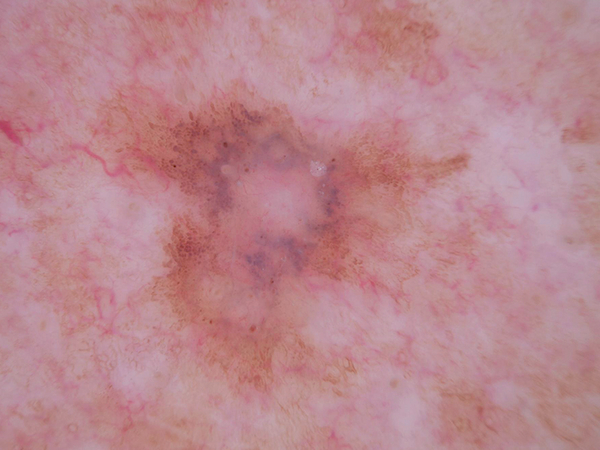

In [5]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/BKL'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [6]:
# Import the Resnet152v2 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




234561536/234545216 [==============================] - 3s 0us/step


In [7]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Skin Diseases/train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [10]:
prediction = Dense(len(folders), name='output', activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.602645 to fit



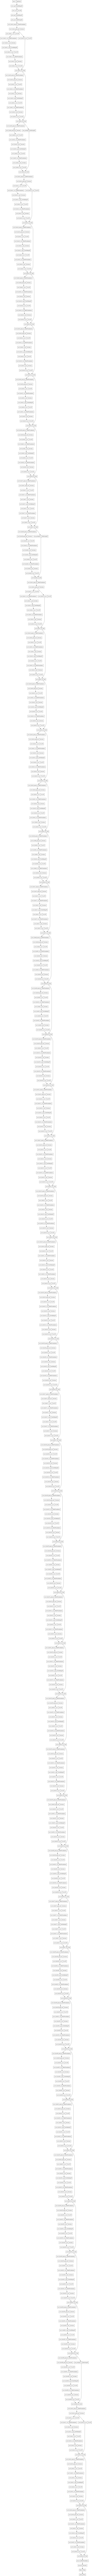

In [12]:
import tensorflow as tf

tf.keras.utils.plot_model( model)

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Skin Diseases/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2367 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Skin Diseases/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 656 images belonging to 3 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs= 30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
74/74 [==============================] - 751s 10s/step - loss: 2.5341 - accuracy: 0.7300 - val_loss: 1.9031 - val_accuracy: 0.7912
Epoch 2/30
74/74 [==============================] - 57s 769ms/step - loss: 1.2257 - accuracy: 0.8226 - val_loss: 1.5726 - val_accuracy: 0.8140
Epoch 3/30
74/74 [==============================] - 65s 883ms/step - loss: 1.0381 - accuracy: 0.8466 - val_loss: 1.8370 - val_accuracy: 0.7866
Epoch 4/30
74/74 [==============================] - 66s 889ms/step - loss: 0.9642 - accuracy: 0.8754 - val_loss: 1.4238 - val_accuracy: 0.8415
Epoch 5/30
74/74 [==============================] - 66s 889ms/step - loss: 0.8410 - accuracy: 0.8787 - val_loss: 3.2561 - val_accuracy: 0.7652
Epoch 6/30
74/74 [==============================] - 66s 889ms/step - loss: 0.8653 - accuracy: 0.8838 - val_loss: 2.7181 - val_accuracy: 0.7988
Epoch 7/30
74/74 [==============================] - 67s 906ms/step - loss: 0.8804 - accuracy: 0.8969 - val_loss: 2.7940 - val_accuracy: 0.8034


In [18]:
import matplotlib.pyplot as plt

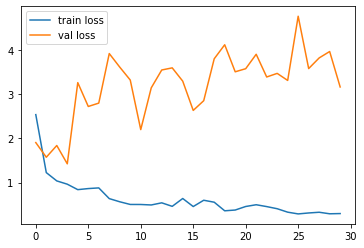

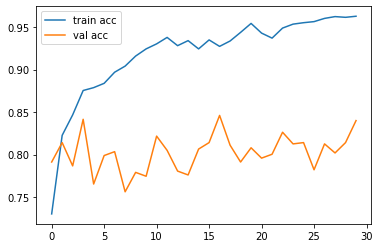

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
#Test DataSet Generator with Augmentation
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_flow = test_generator.flow_from_directory(
    '/content/drive/MyDrive/Skin Diseases/test',
    shuffle=False,
    target_size=(224, 224),
    batch_size = 32
)

Found 656 images belonging to 3 classes.


In [23]:
import math
import numpy as np
predictions = model.predict_generator(
    test_flow,
    verbose=1,
    steps=math.ceil(test_flow.samples/test_flow.batch_size))
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = test_flow.classes
class_labels = list(test_flow.class_indices.keys())  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


21/21 [==============================] - 11s 413ms/step


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
0 : ACNE
1 : BKL
2 : MELANOMA


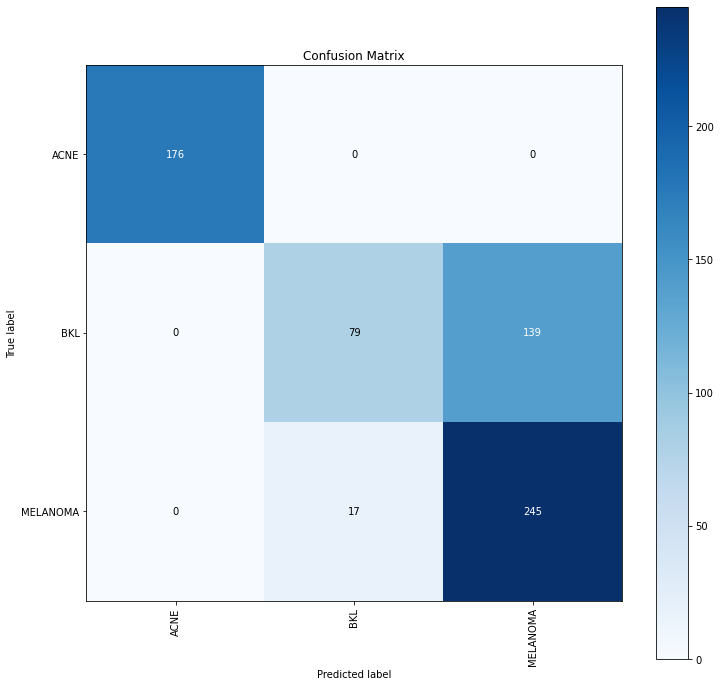

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline  
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

[print(k, ":", v) for k,v in enumerate(class_labels)]
true_map_classes = [class_labels[x] for x in true_classes]
predicted_map_classes = [class_labels[x] for x in predicted_classes]

plot_confusion_matrix(
    true_map_classes, 
    predicted_map_classes,
    labels=class_labels,
    x_tick_rotation=90,
    figsize=(12,12))




In [25]:
from sklearn.metrics import classification_report
report = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels)
print(report)

              precision    recall  f1-score   support

        ACNE       1.00      1.00      1.00       176
         BKL       0.82      0.36      0.50       218
    MELANOMA       0.64      0.94      0.76       262

    accuracy                           0.76       656
   macro avg       0.82      0.77      0.75       656
weighted avg       0.80      0.76      0.74       656



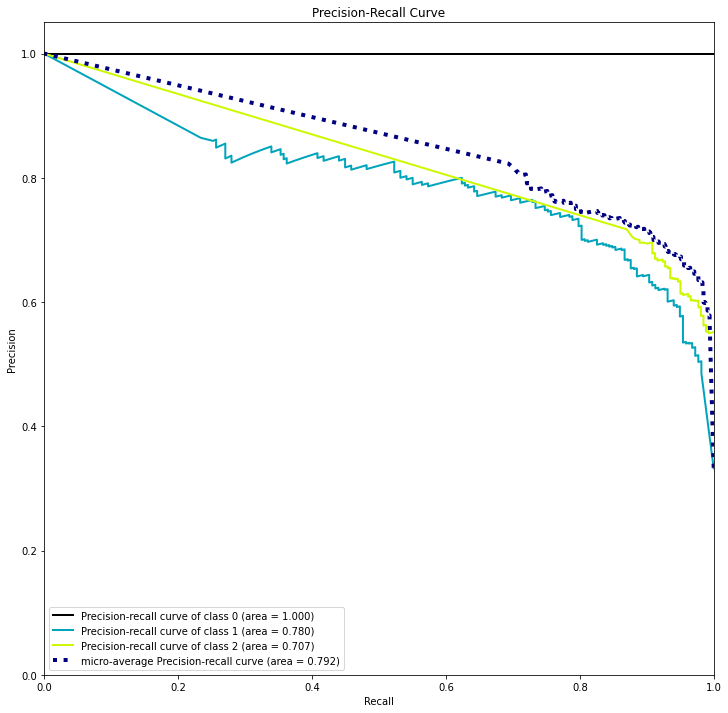

In [26]:
from scikitplot.metrics import plot_precision_recall
plot_precision_recall(
    true_classes,
    predictions,
    figsize=(12,12))

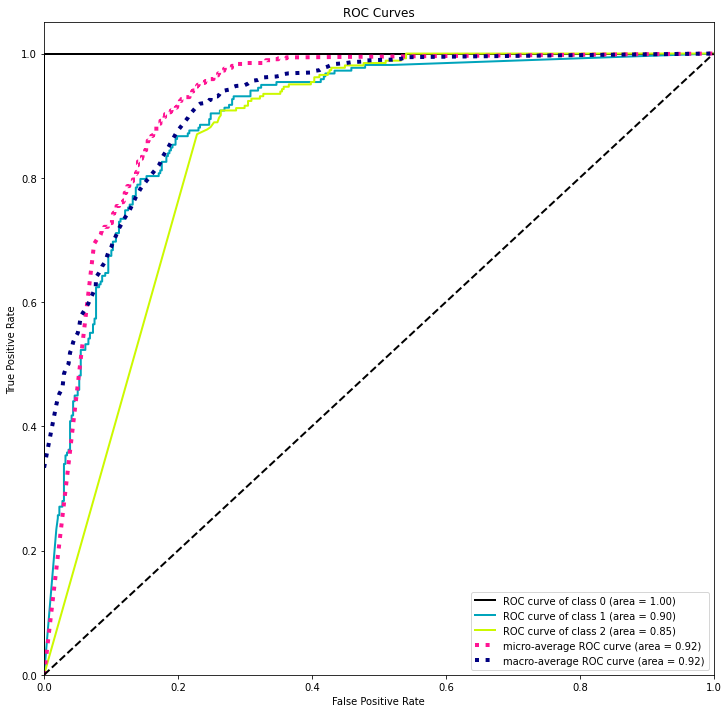

In [27]:
plot_roc(
    true_classes,
    predictions,
    figsize=(12,12))

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

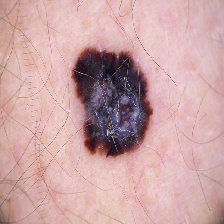

In [31]:
img=image.load_img('/content/drive/MyDrive/Skin Diseases/test/MELANOMA/mel_1048.jpg',target_size=(224,224))

display(img)

In [32]:
x=image.img_to_array(img)
x

array([[[185., 141., 138.],
        [194., 145., 141.],
        [195., 146., 141.],
        ...,
        [196., 162., 163.],
        [192., 161., 159.],
        [193., 158., 152.]],

       [[182., 145., 139.],
        [194., 145., 148.],
        [196., 149., 143.],
        ...,
        [198., 164., 163.],
        [199., 164., 162.],
        [192., 159., 150.]],

       [[180., 137., 130.],
        [188., 143., 140.],
        [193., 148., 143.],
        ...,
        [199., 169., 167.],
        [198., 164., 163.],
        [193., 160., 153.]],

       ...,

       [[106.,  79.,  70.],
        [120.,  91.,  85.],
        [122.,  93.,  89.],
        ...,
        [116.,  87.,  79.],
        [114.,  86.,  82.],
        [102.,  71.,  69.]],

       [[ 90.,  60.,  58.],
        [ 94.,  62.,  67.],
        [100.,  71.,  67.],
        ...,
        [111.,  82.,  76.],
        [105.,  80.,  75.],
        [ 94.,  69.,  64.]],

       [[108.,  79.,  71.],
        [105.,  80.,  75.],
        [105.,  

In [33]:
x.shape

(224, 224, 3)

In [34]:
x=x/255

In [35]:

import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [36]:
model.predict(img_data)

array([[2.3338851e-04, 9.9976665e-01, 7.1505833e-13]], dtype=float32)

In [37]:
a=np.argmax(model.predict(img_data), axis=1)

In [38]:
a==1

array([ True])

In [39]:
import tensorflow as tf

In [40]:
tf.__version__

'2.8.2'